In [1]:
!pip install pandas==2.1.1
!pip install scorecardpy==0.1.9.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 506.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60634 sha256=b4ff6fe39ab2d86c217da06f433c78f9b02f059027833ccf122a64720f71bd5a
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scoreca

In [2]:
import warnings

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import scorecardpy as sc
import pprint

In [3]:
# sample code
# data file is the same as Session 7 lab data
full_data = pd.read_csv('merged.csv')

with pd.option_context('display.max_rows', 6):
    display(full_data)

# use a copy of hmeq_data for credit risk model
full_data_copy = full_data.copy()

# check for missing values
full_data_copy.isnull().sum()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-544.500000,-1097.333333,0.000,0.0,1017400.50,0.000,202500.00,0.0,-816.000000,NaN
1,100041,0,Cash loans,F,N,N,0,112500.0,450000.0,44509.5,...,-969.153846,-1066.000000,5830.965,0.0,822305.16,0.000,0.00,0.0,-992.846154,NaN
2,100088,0,Revolving loans,F,N,N,0,112500.0,135000.0,6750.0,...,64.500000,-871.333333,NaN,0.0,1777500.00,504961.875,0.00,0.0,-397.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,333.000000,-1534.166667,0.000,0.0,6262312.50,4190481.900,0.00,0.0,-770.000000,NaN
8007,456240,0,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,...,12425.000000,-2464.000000,7992.000,0.0,132399.00,79744.500,50127.75,0.0,-1238.500000,NaN
8008,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,3231.272727,-968.333333,25578.000,1.0,3801919.50,2110505.389,0.00,0.0,-531.090909,0.0


SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                          ... 
AMT_CREDIT_SUM_DEBT        833
AMT_CREDIT_SUM_LIMIT      1373
AMT_CREDIT_SUM_OVERDUE     833
DAYS_CREDIT_UPDATE         833
AMT_ANNUITY_y             5732
Length: 131, dtype: int64

In [4]:
y = 'TARGET'
bins = sc.woebin(full_data_copy, y = y)
print(type(bins)) # bins is a dictionary

# make it easy to read the bins
for variable, bindetails in bins.items():
    print(f'{variable=}')
    display(bindetails) # bindetails is a dataframe
    print('-' * 100)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
# Assuming you have already defined y and bins as mentioned in your code

# Create a dictionary to store IV scores for each variable
iv_scores = {}

# Calculate IV scores for each variable and store them in the dictionary
for variable, bindetails in bins.items():
    iv_scores[variable] = bindetails.total_iv[0]

# Sort the dictionary by IV scores in descending order
sorted_iv_scores = sorted(iv_scores.items(), key=lambda x: x[1], reverse=True)

# Print variable and IV scores from highest to lowest
for variable, iv_score in sorted_iv_scores:
    print(f'{variable}: {iv_score}')


ORGANIZATION_TYPE: 0.1400036088106913
DAYS_CREDIT: 0.10245866565016735
AMT_GOODS_PRICE: 0.09738821573090284
DAYS_EMPLOYED: 0.09293435727617634
AMT_CREDIT: 0.09226497816050186
DAYS_ENDDATE_FACT: 0.09094458586755419
AMT_ANNUITY_x: 0.07807616086308901
REGION_RATING_CLIENT_W_CITY: 0.07436718263187103
REGION_RATING_CLIENT: 0.07089193461112495
REGION_POPULATION_RELATIVE: 0.06721303599002953
DAYS_CREDIT_UPDATE: 0.056800955945855366
LIVINGAREA_MEDI: 0.055446939554294736
FLOORSMAX_MEDI: 0.05420262315037798
DAYS_BIRTH: 0.05276278660799993
FLOORSMAX_MODE: 0.05124078719355111
FLOORSMAX_AVG: 0.05103722793087616
AMT_INCOME_TOTAL: 0.0506838894236242
TOTALAREA_MODE: 0.050250642740018156
OWN_CAR_AGE: 0.05010236797929989
AMT_CREDIT_SUM_DEBT: 0.04935780097692321
LANDAREA_MEDI: 0.047693599496860604
BASEMENTAREA_MODE: 0.047142383390049274
YEARS_BUILD_MEDI: 0.046744036682750054
FLAG_DOCUMENT_3: 0.046647611072095564
LANDAREA_AVG: 0.04633156168222156
LIVINGAREA_MODE: 0.04608119464958186
YEARS_BUILD_AVG: 0.046

In [6]:
sc.woebin_plot(bins);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Credit-to-Income Ratio
full_data['Credit_to_Income_Ratio'] = full_data['AMT_CREDIT'] / full_data['AMT_INCOME_TOTAL']

# Age of the Client
full_data['Age'] = -full_data['DAYS_BIRTH'] / 365

# Length of Employment
full_data['Employment_Length'] = -full_data['DAYS_EMPLOYED'] / 365

# Loan Amount to Income Ratio
full_data['Loan_to_Income_Ratio'] = full_data['AMT_CREDIT'] / full_data['AMT_INCOME_TOTAL']

# Selecting the required columns
df = full_data[["SK_ID_CURR", "TARGET", "Credit_to_Income_Ratio", "Age", "Employment_Length", "Loan_to_Income_Ratio"]]

In [14]:
def calculate_iv_scores(df_for_cal):
    # Binning
    bins = sc.woebin(df_for_cal, y="TARGET")

    # Create a dictionary to store IV scores for each variable
    iv_scores = {}

    # Calculate IV scores for each variable and store them in the dictionary
    for variable, bindetails in bins.items():
        iv_scores[variable] = bindetails.total_iv[0]

    # Sort the dictionary by IV scores in descending order
    sorted_iv_scores = sorted(iv_scores.items(), key=lambda x: x[1], reverse=True)

    # Print variable and IV scores from highest to lowest
    for variable, iv_score in sorted_iv_scores:
        print(f'{variable}: {iv_score}')

    return bins


In [ ]:
# Example usage:
calculate_iv_scores(df)

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:34: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: Employed)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:92: UserWarning: There are infinite or NaN values in 2 columns, which are replaced with -999.
 (ColumnNames: Credit_Utilization_Ratio, Val2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
/usr

Credit_Length: 0.10494861503781834
Val1: 0.10355216930365488
Credit_Utilization_Ratio: 0.07965628515793444
LTV_Ratio: 0.056378284013858415
Document_Provided_Count: 0.04034407019727502
SK_ID_CURR: 0.03837314640658776
Val2: 2.7787088881474632e-05


/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binni

In [ ]:
columns = full_data.columns
for i in columns:
  print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY_x
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BE

In [51]:
# Loan-to-Value (LTV) Ratio
full_data['LTV_Ratio'] = full_data['AMT_CREDIT'] / full_data['AMT_GOODS_PRICE']

# # Debt-to-Income Ratio (DTI)
# full_data['DTI'] = full_data['AMT_ANNUITY_x'] / full_data['AMT_INCOME_TOTAL']

# Employment Status
full_data['Employed'] = full_data['DAYS_EMPLOYED'] < 0  # True if employed, False otherwise

# Credit Length
full_data['Credit_Length'] = -full_data['DAYS_CREDIT'] / 365  # Convert days to years

# Days Employed Positive
full_data['Days_Employed_Positive'] = -full_data['DAYS_EMPLOYED']
full_data['Annuity_Over_Credit'] = full_data["AMT_ANNUITY_x"]/ full_data['AMT_CREDIT']
full_data['Val2'] = full_data["AMT_CREDIT_SUM"] * full_data["AMT_CREDIT_SUM_LIMIT"]/  full_data['AMT_CREDIT_MAX_OVERDUE']
full_data['Val3'] = full_data["LTV_Ratio"] * full_data['AMT_CREDIT_SUM']
full_data['Val4'] = full_data["AMT_INCOME_TOTAL"] * full_data['AMT_CREDIT']

# Income to goods price
full_data['Income_Price'] = full_data["AMT_INCOME_TOTAL"] * full_data['AMT_CREDIT_SUM_LIMIT']

# # Payment-to-Income Ratio (PTI)
# full_data['PTI'] = full_data['AMT_ANNUITY_x'] / full_data['AMT_INCOME_TOTAL']

# Age at Loan Application
from datetime import datetime
current_date = datetime.now()
full_data['Age_at_Loan_Application'] = (current_date - full_data['DAYS_BIRTH'].apply(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x))).dt.days / 365

# # Ratio of Living Area to Total Area
# full_data['Living_Area_Ratio'] = full_data['LIVINGAREA_AVG'] / full_data['TOTALAREA_MODE']

# # Income Type Stability
# income_type_stability = full_data.groupby('NAME_INCOME_TYPE')['DAYS_EMPLOYED'].std()
# full_data['Income_Type_Stability'] = full_data['NAME_INCOME_TYPE'].map(income_type_stability)

# Credit Utilization Ratio
full_data['Credit_Utilization_Ratio'] = full_data['AMT_CREDIT_SUM_DEBT'] / full_data['AMT_CREDIT_SUM']

# # Social Circles Interaction
# full_data['Social_Circles_Interaction'] = full_data['OBS_30_CNT_SOCIAL_CIRCLE'] * full_data['DEF_30_CNT_SOCIAL_CIRCLE']

# Document Provided Count
document_flags = [col for col in full_data.columns if col.startswith('FLAG_DOCUMENT_')]
full_data['Document_Provided_Count'] = full_data[document_flags].sum(axis=1)

# Social Surroundings Default
#full_data['Social_Surroundings_Default'] = full_data['OBS_30_CNT_SOCIAL_CIRCLE'] + full_data['OBS_60_CNT_SOCIAL_CIRCLE'] + full_data['DEF_30_CNT_SOCIAL_CIRCLE'] + full_data['DEF_60_CNT_SOCIAL_CIRCLE']
# full_data['Social_Surroundings_Default'] = full_data['OBS_60_CNT_SOCIAL_CIRCLE'] + full_data['DEF_60_CNT_SOCIAL_CIRCLE']

# Property Ownership Status
# full_data['Property_Ownership_Status'] = 'None'
# full_data.loc[(full_data['FLAG_OWN_CAR'] == 'Y') & (full_data['FLAG_OWN_REALTY'] == 'Y'), 'Property_Ownership_Status'] = 'Owns Car and Realty'
# full_data.loc[(full_data['FLAG_OWN_CAR'] == 'Y') & (full_data['FLAG_OWN_REALTY'] == 'N'), 'Property_Ownership_Status'] = 'Owns Car, No Realty'
# full_data.loc[(full_data['FLAG_OWN_CAR'] == 'N') & (full_data['FLAG_OWN_REALTY'] == 'Y'), 'Property_Ownership_Status'] = 'Owns Realty, No Car'


In [52]:
df = full_data[["SK_ID_CURR", "TARGET", "LTV_Ratio", "Employed", "Credit_Length",  "Credit_Utilization_Ratio","Document_Provided_Count", "Annuity_Over_Credit", "Val2", "Val4", "Income_Price", "Age_at_Loan_Application", "Days_Employed_Positive"]]

In [59]:
#calculate_iv_scores(df)
new_bins = calculate_iv_scores(df_final)

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()


[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ORGANIZATION_TYPE
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:92: UserWarning: There are infinite or NaN values in 1 columns, which are replaced with -999.
 (ColumnNames: Credit_Utilization_Ratio)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  init_bin = init_bin.groupby('brkp', group_keys=False).agg({
/usr/local/lib/python3.10/dist-packages/scorec

Binning on 8009 rows and 12 columns in 00:00:18
ORGANIZATION_TYPE: 0.1400036088106913
Credit_Length: 0.10494861503781834
Annuity_Over_Credit: 0.10355216930365488
DAYS_CREDIT: 0.10245866565016735
Days_Employed_Positive: 0.09387535108698743
AMT_CREDIT: 0.09226497816050186
Credit_Utilization_Ratio: 0.07965628515793444
REGION_POPULATION_RELATIVE: 0.06721303599002953
LTV_Ratio: 0.056378284013858415
Age_at_Loan_Application: 0.05296743082777639
SK_ID_CURR: 0.03837314640658776


/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:442: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning_1bst_brk = binning_1bst_brk.groupby(['variable', 'bstbin'], group_keys=False)\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index().assign(bin=lambda x: x['bstbin'])\
/usr/local/lib/python3.10/dist-packages/scorecardpy/woebin.py:443: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be us

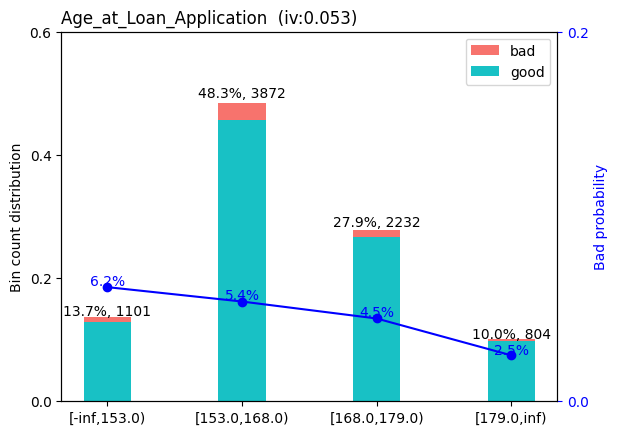

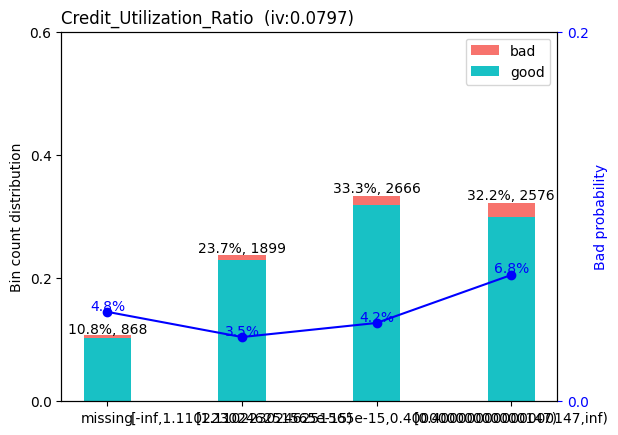

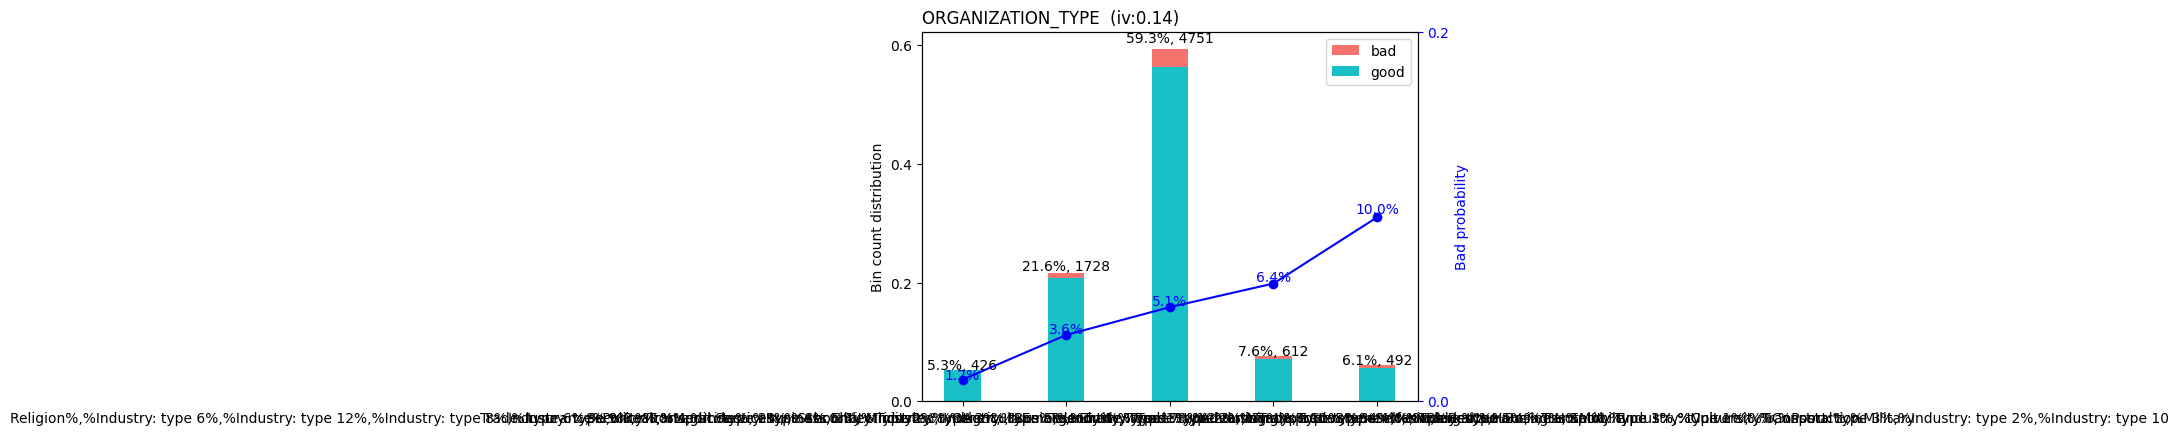

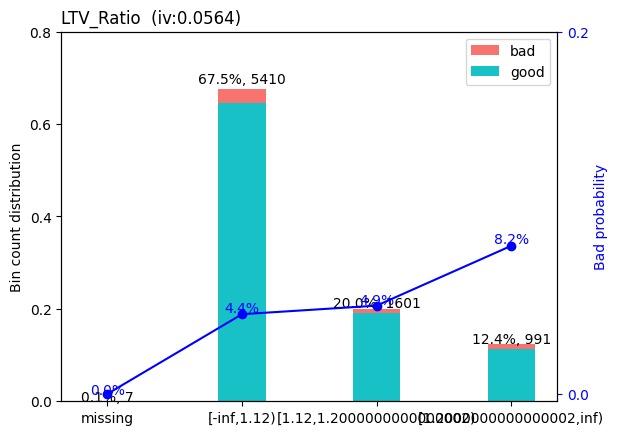

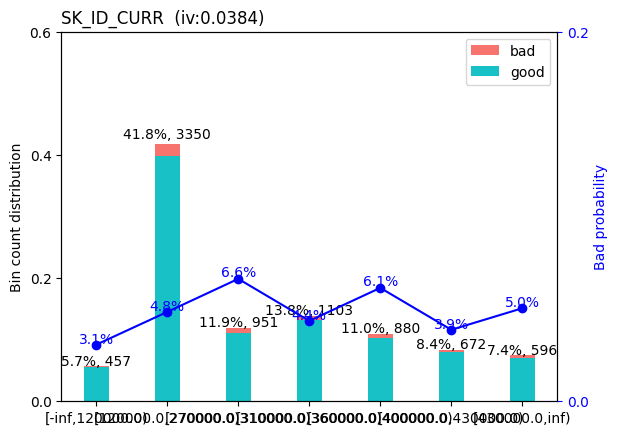

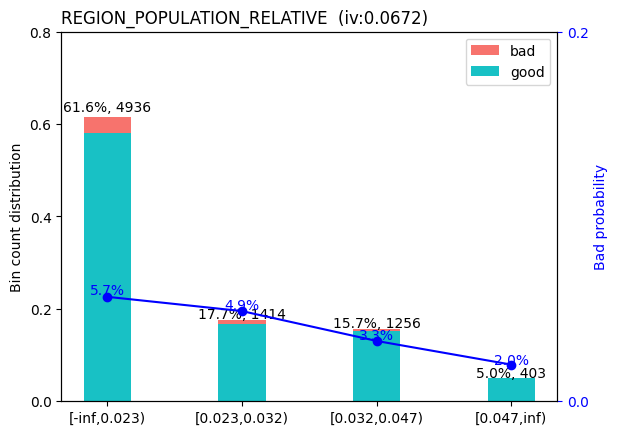

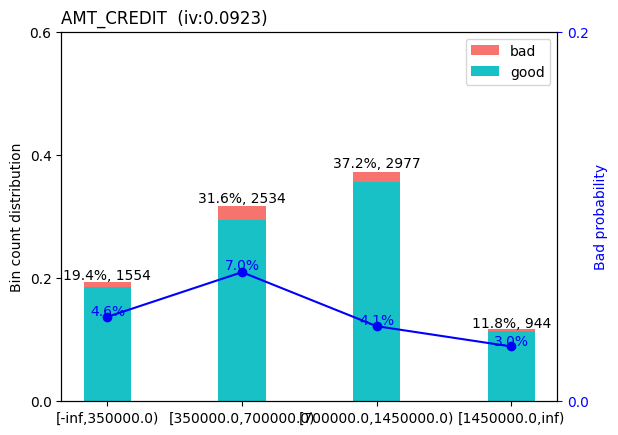

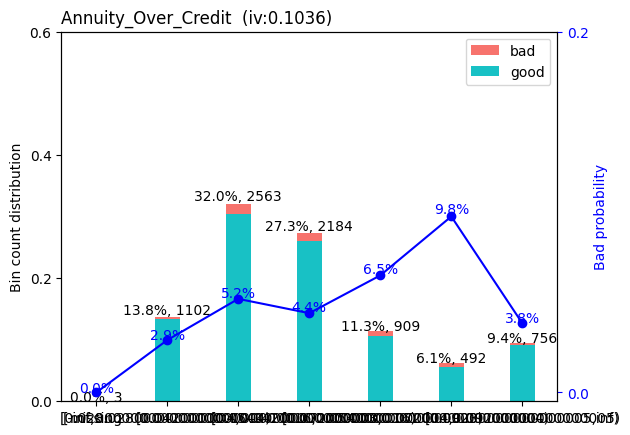

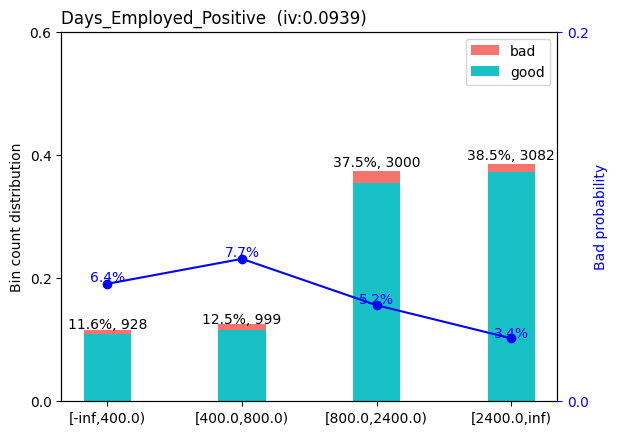

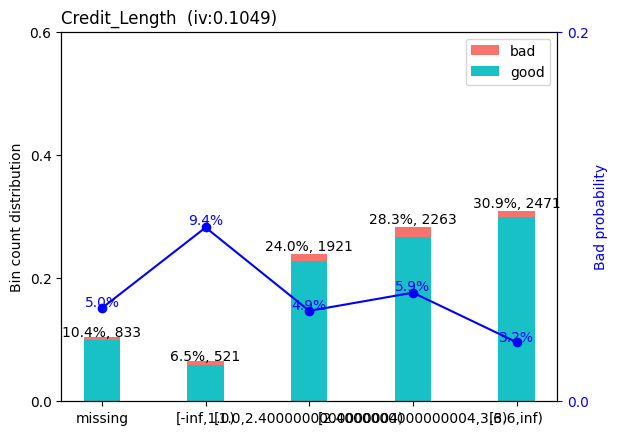

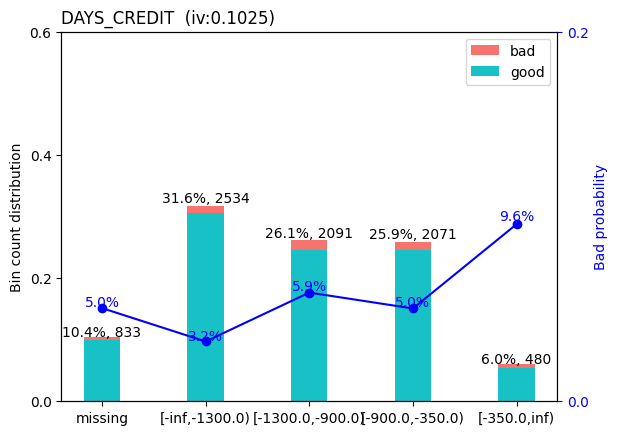

In [60]:
sc.woebin_plot(new_bins);

1.  ORGANIZATION_TYPE: 0.1400036088106913 (Monotonic)
2.  DAYS_CREDIT: 0.10245866565016735 (works)
3.  REGION_POPULATION_RELATIVE: 0.0672
4.  Days_Employed_Positive: 0.09387535108698743 (Monotonic)
5.  LTV_Ratio: 0.056378284013858415
6.  Age_at_Loan_Application: 0.05296743082777639
7.  Credit_Length: 0.10494861503781834 (need adjust, missing and first bin together)
8.  Annuity_Over_Credit: 0.10355216930365488 (Last one needs adjustment)
9.  Credit_Utilization_Ratio: 0.07965628515793444
10. AMT_CREDIT: 0.09226497816050186
---
*  AMT_GOODS_PRICE: 0.09738821573090284
*   DAYS_ENDDATE_FACT: 0.09094458586755419 (bad)



In [26]:
import pandas as pd
import numpy as np

def create_division_features(full_data, numerator_columns, divisor_columns):
    """
    Create division features by dividing each numerator column by the corresponding divisor column.
    If the divisor is NaN or 0, return 0.

    Args:
    - full_data (DataFrame): The DataFrame containing all data.
    - numerator_columns (list): List of column names to be used as numerators.
    - divisor_columns (list): List of column names to be used as divisors.

    Returns:
    - DataFrame: A DataFrame containing the division features.
    """
    # Create an empty DataFrame to store the results
    df = pd.DataFrame()
    df['TARGET'] = full_data['TARGET']

    # Iterate over the pairs of numerator and divisor columns
    for numerator_col in numerator_columns:
      for divisor_col in divisor_columns:
        # Perform division and handle NaN or zero divisors
        divisor = full_data[divisor_col]
        divisor_nonzero = divisor.replace(0, np.nan)  # Replace 0 with NaN to avoid division by zero
        df[f'{numerator_col}_divided_by_{divisor_col}'] = np.where(divisor_nonzero.isnull(), 0, full_data[numerator_col] / divisor_nonzero)

    return df

# Example usage:
numerator_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x']
divisor_columns = ['CNT_FAM_MEMBERS', 'OWN_CAR_AGE', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE']

division_features = create_division_features(full_data, numerator_columns, divisor_columns)

# Display the resulting DataFrame
division_features


,TARGET,AMT_INCOME_TOTAL_divided_by_CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_divided_by_OWN_CAR_AGE,AMT_INCOME_TOTAL_divided_by_CREDIT_DAY_OVERDUE,AMT_INCOME_TOTAL_divided_by_DAYS_CREDIT_ENDDATE,AMT_INCOME_TOTAL_divided_by_DAYS_ENDDATE_FACT,AMT_INCOME_TOTAL_divided_by_AMT_CREDIT_MAX_OVERDUE,AMT_INCOME_TOTAL_divided_by_CNT_CREDIT_PROLONG,AMT_INCOME_TOTAL_divided_by_AMT_CREDIT_SUM,AMT_INCOME_TOTAL_divided_by_AMT_CREDIT_SUM_DEBT,...,AMT_ANNUITY_x_divided_by_CREDIT_DAY_OVERDUE,AMT_ANNUITY_x_divided_by_DAYS_CREDIT_ENDDATE,AMT_ANNUITY_x_divided_by_DAYS_ENDDATE_FACT,AMT_ANNUITY_x_divided_by_AMT_CREDIT_MAX_OVERDUE,AMT_ANNUITY_x_divided_by_CNT_CREDIT_PROLONG,AMT_ANNUITY_x_divided_by_AMT_CREDIT_SUM,AMT_ANNUITY_x_divided_by_AMT_CREDIT_SUM_DEBT,AMT_ANNUITY_x_divided_by_AMT_CREDIT_SUM_LIMIT,AMT_ANNUITY_x_divided_by_AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY_x_divided_by_DAYS_CREDIT_UPDATE
0,0,135000.0,0.0,0.000000,-495.867769,-246.051033,0.000000,0.0,0.265382,0.000000,...,0.0,-65.561983,-32.532047,0.000000,0.0,0.035088,0.000000,0.176289,0.000000,-43.748162
1,0,56250.0,0.0,0.000000,-116.080641,-105.534709,19.293547,0.0,0.136811,0.000000,...,0.0,-45.926145,-41.753752,7.633299,0.0,0.054128,0.000000,0.000000,0.000000,-44.830208
2,0,56250.0,0.0,0.000000,1744.186047,-129.112471,0.000000,0.0,0.063291,0.222789,...,0.0,104.651163,-7.746748,0.000000,0.0,0.003797,0.013367,0.000000,0.000000,-17.002519
3,0,67500.0,0.0,2454.545455,339.195980,0.000000,0.000000,0.0,0.365943,1.240387,...,513.0,70.891960,0.000000,0.000000,0.0,0.076482,0.259241,0.000000,169.459459,-391.875000
4,0,78750.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,0,81000.0,0.0,0.000000,-372.128637,-260.533934,0.000000,0.0,0.523286,1.444159,...,0.0,-66.693721,-46.693471,0.000000,0.0,0.093785,0.258825,0.000000,0.000000,-61.059937
8005,0,45000.0,0.0,0.000000,-83.720930,-78.397213,0.000000,0.0,0.611180,0.000000,...,0.0,-21.160465,-19.814895,0.000000,0.0,0.154476,0.000000,0.000000,0.000000,-21.239496
8006,0,90000.0,90000.0,0.000000,540.540541,-117.327539,0.000000,0.0,0.028743,0.042954,...,0.0,71.391892,-15.496035,0.000000,0.0,0.003796,0.005673,0.000000,0.000000,-30.874675
8007,0,180000.0,0.0,0.000000,28.973843,-146.103896,45.045045,0.0,2.719054,4.514418,...,0.0,1.358149,-6.848620,2.111486,0.0,0.127456,0.211613,0.336640,0.000000,-13.625353


In [63]:
df_final = full_data[["SK_ID_CURR", "TARGET", "ORGANIZATION_TYPE", "DAYS_CREDIT", "REGION_POPULATION_RELATIVE", "Days_Employed_Positive", "LTV_Ratio", "Age_at_Loan_Application", "Credit_Length", "Annuity_Over_Credit", "Credit_Utilization_Ratio", "AMT_CREDIT"]]

df_final.to_csv("final_data.csv", index=False)
print("Saved")

Saved
